<h2>Luokiteltu jakauma</h2>

Määrällisen muuttujan jakaumaan tutustun luokitellun jakauman avulla. Nopein tapa on <b>hist</b>-kaaviolajin käyttö.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Tyyli vaikuttaa kaavioiden ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('fivethirtyeight')

In [2]:
# Datan avaaminen
df = pd.read_excel('http://taanila.fi/data1.xlsx')

# n-arvot
n = df['palkka'].count()
miehet = df['palkka'][df['sukup']==1].count()
naiset = df['palkka'][df['sukup']==2].count()

df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
# Määrittelen luokkarajat palkan luokittelemiseksi 
# Vaihtoehtoisesti voin antaa luokkien lukumäärän
bins = [1000, 2000, 3000, 4000, 7000]

# Lisään dataan palkkaluokka-sarakkeen
df['Palkkaluokka'] = pd.cut(df['palkka'], bins = bins)

# Palkkaluokkiin kuuluvien lukumäärät
df1 = pd.crosstab(df['Palkkaluokka'], 'lkm')

# Häiritsevän otsikon poistaminen
df1.columns.name = ''

# Prosentit
df1['%'] = df1/n*100

# Prosenttilukujen ulkoasun viimeistely
df1.style.format({'%': '{:.1f} %'})

,lkm,%
Palkkaluokka,,
"(1000, 2000]",19,23.2 %
"(2000, 3000]",50,61.0 %
"(3000, 4000]",8,9.8 %
"(4000, 7000]",5,6.1 %


[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '70 %')]

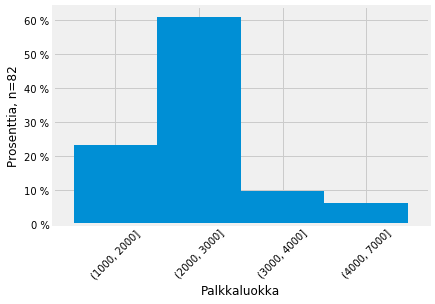

In [4]:
# Prosentit pystypylväskaaviona
# width=1 laittaa pylväät kiinni toisiinsa
ax1 = df1['%'].plot.bar(width=1, rot=45)

# y-akselin otsikko
ax1.set_ylabel('Prosenttia, n='+str(n))

# y-akselin prosenttilukujen ulkoasun viimeistely
ax1.set_yticklabels(['{:.0f} %'.format(y) for y in ax1.get_yticks()])

Text(0, 0.5, 'Lukumäärä')

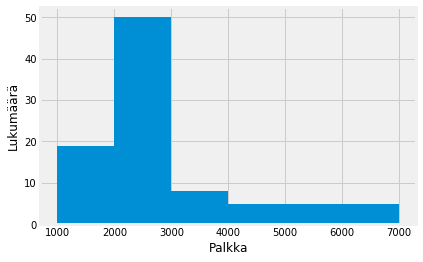

In [5]:
# Nopein tapa luokitellun jakauman tarkasteluun on hist-kaavio
# Vertaa edelliseen kaavioon!

# Luokiteltu jakauma
ax2 = df['palkka'].hist(bins=bins)

# x- ja y-akselien otsikot
ax2.set_xlabel('Palkka')
ax2.set_ylabel('Lukumäärä')

[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '70 %')]

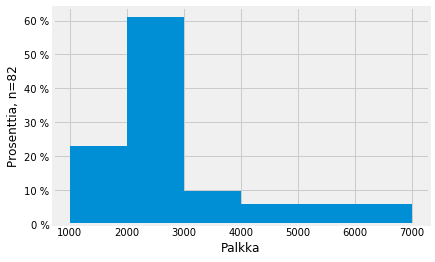

In [6]:
# np.ones kikalla prosentit hist-kaavioon
# np.ones tuottaa n kpl ykkösiä, jolloin jokaiselle luokalle tulee painoksi 1/n

# Histogrammi, jossa y-akselilla prosentit
ax3 = df['palkka'].hist(bins=bins, weights=np.ones(n)/n)

# Akselien otsikot
ax3.set_xlabel('Palkka')
ax3.set_ylabel('Prosenttia, n='+str(n))

# y-akselin prosenttilukujen ulkoasun viimeistely
ax3.set_yticklabels(['{:.0f} %'.format(y*100) for y in ax3.get_yticks()])

In [7]:
# Luokiteltu jakauma sukupuolittain
df2 = pd.crosstab(df['Palkkaluokka'], df['sukup'], normalize='columns')

# Sarakeotsikot
df2.columns = ['Mies, n='+str(miehet), 'Nainen, n='+str(naiset)]

# Prosenttilukujen ulkoasun viimeistely
(df2*100).style.format('{:.1f} %')

,"Mies, n=63","Nainen, n=19"
Palkkaluokka,,
"(1000, 2000]",20.6 %,31.6 %
"(2000, 3000]",58.7 %,68.4 %
"(3000, 4000]",12.7 %,0.0 %
"(4000, 7000]",7.9 %,0.0 %


[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '70 %')]

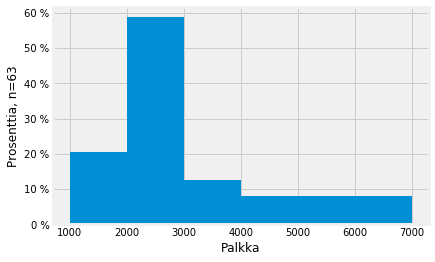

In [8]:
# Miesten luokiteltu jakauma
ax4 = df[df['sukup']==1]['palkka'].hist(bins=bins, weights=np.ones(miehet)/miehet)

# Akselien otsikot
ax4.set_xlabel('Palkka')
ax4.set_ylabel('Prosenttia, n='+str(miehet))

# y-akselin prosenttilukujen ulkoasun viimeistely
ax4.set_yticklabels(['{:.0f} %'.format(y*100) for y in ax4.get_yticks()])

[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '70 %'),
 Text(0, 0, '80 %')]

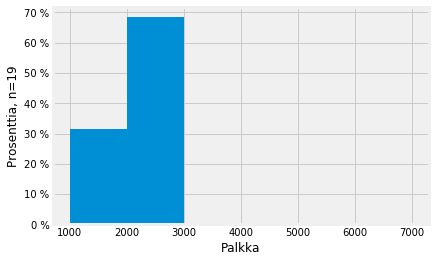

In [9]:
# Naisten luokiteltu jakauma
ax5 = df[df['sukup']==2]['palkka'].hist(bins=bins, weights=np.ones(naiset)/naiset)

# Akselien otsikot
ax5.set_xlabel('Palkka')
ax5.set_ylabel('Prosenttia, n='+str(naiset))

# y-akselin prosenttilukujen ulkoasun viimeistely
ax5.set_yticklabels(['{:.0f} %'.format(y*100) for y in ax5.get_yticks()])